<a href="https://www.kaggle.com/code/lalit7881/customer-shopping-prediction-86-41-accuracy?scriptVersionId=295605692" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-behaviour-analysis/shopping_behavior_updated (1).csv


## Customer Shopping Prediction – 86.41% Accuracy


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/customer-shopping-behaviour-analysis/shopping_behavior_updated (1).csv")

In [3]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Yes,31,PayPal,Annually


In [4]:
df.tail()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,No,33,Venmo,Quarterly


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Previous Purchases      3900 non-null   int64  
 14  Payment Method          3900 non-null   

In [6]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [7]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Discount Applied             2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [10]:
df.shape

(3900, 16)

In [11]:
df.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Discount Applied           object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [12]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Discount Applied',
       'Previous Purchases', 'Payment Method', 'Frequency of Purchases'],
      dtype='object')

## Data visualizations

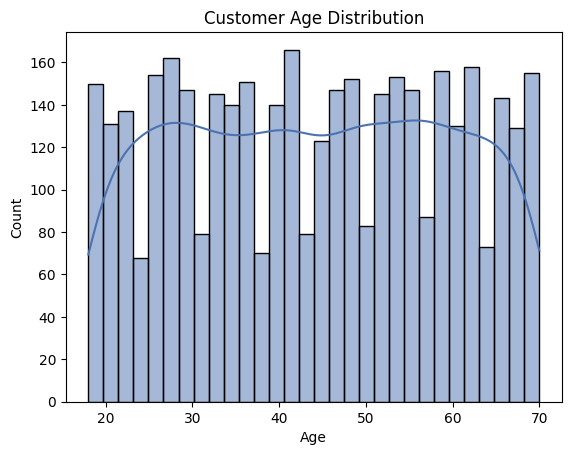

In [13]:
sns.histplot(df['Age'], bins=30, kde=True, color="#4C72B0")
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


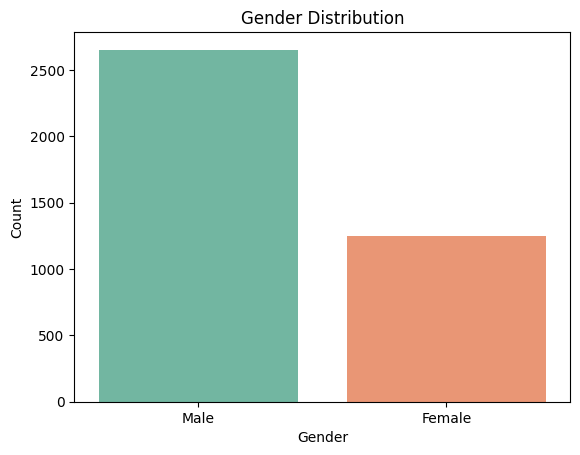

In [14]:
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


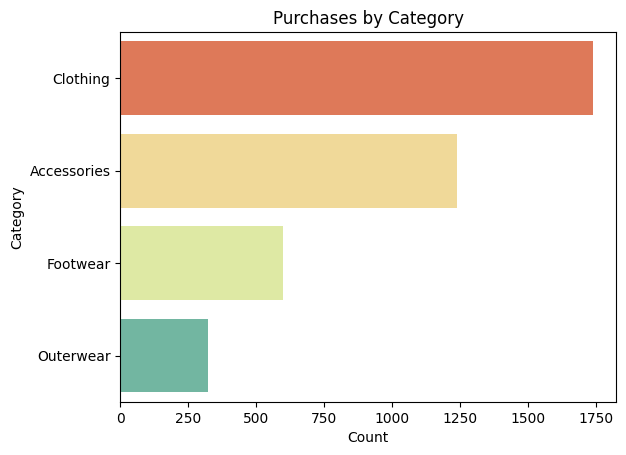

In [15]:
sns.countplot(
    y='Category',
    data=df,
    palette='Spectral',
    order=df['Category'].value_counts().index
)
plt.title("Purchases by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


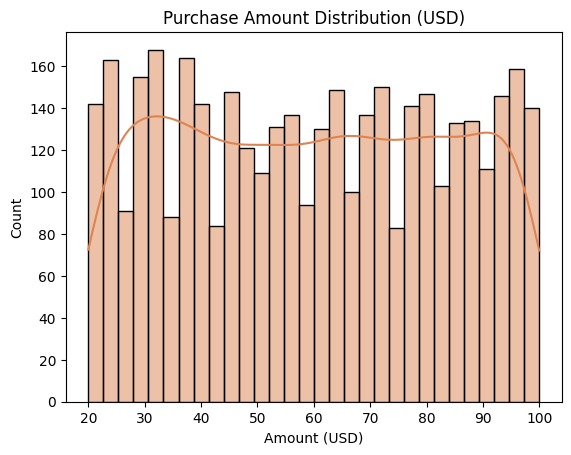

In [16]:
sns.histplot(df['Purchase Amount (USD)'], bins=30, kde=True, color="#DD8452")
plt.title("Purchase Amount Distribution (USD)")
plt.xlabel("Amount (USD)")
plt.ylabel("Count")
plt.show()


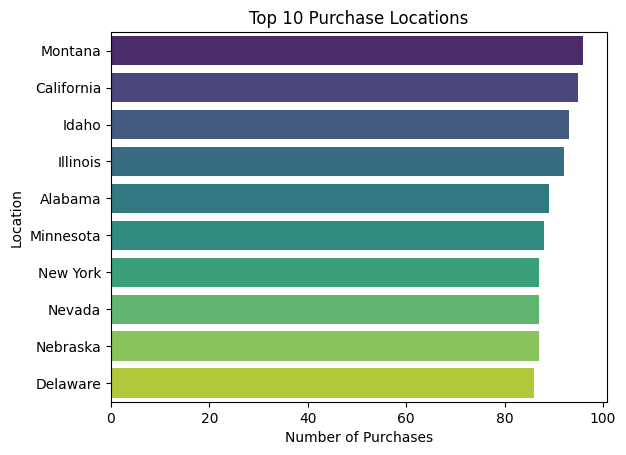

In [17]:
top_locations = df['Location'].value_counts().head(10)

sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 10 Purchase Locations")
plt.xlabel("Number of Purchases")
plt.ylabel("Location")
plt.show()


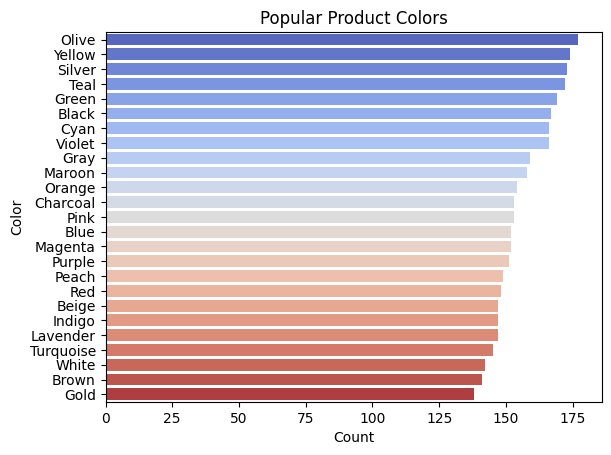

In [18]:
sns.countplot(
    y='Color',
    data=df,
    palette='coolwarm',
    order=df['Color'].value_counts().index
)
plt.title("Popular Product Colors")
plt.xlabel("Count")
plt.ylabel("Color")
plt.show()


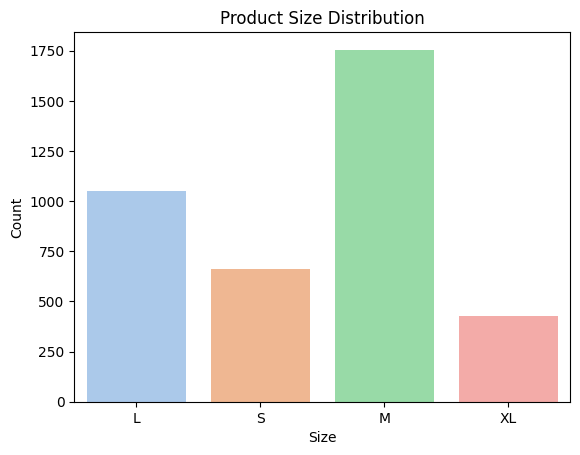

In [19]:
sns.countplot(x='Size', data=df, palette='pastel')
plt.title("Product Size Distribution")
plt.xlabel("Size")
plt.ylabel("Count")
plt.show()


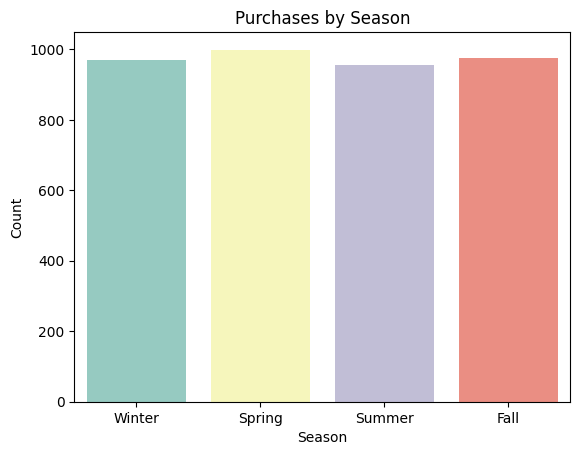

In [20]:
sns.countplot(x='Season', data=df, palette='Set3')
plt.title("Purchases by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.show()


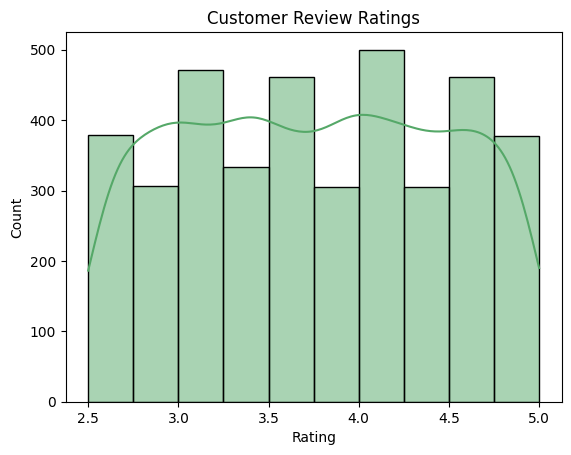

In [21]:
sns.histplot(df['Review Rating'], bins=10, kde=True, color="#55A868")
plt.title("Customer Review Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


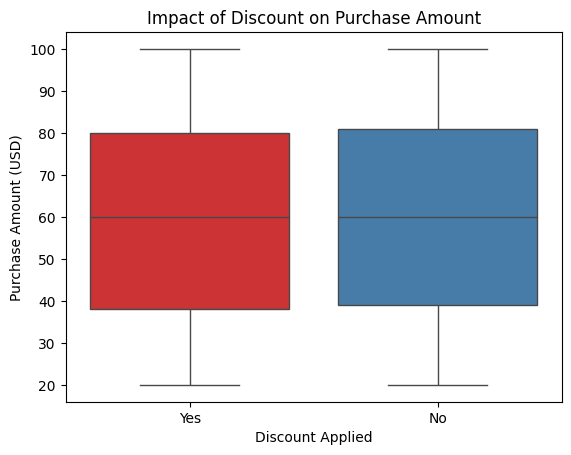

In [22]:
sns.boxplot(
    x='Discount Applied',
    y='Purchase Amount (USD)',
    data=df,
    palette='Set1'
)
plt.title("Impact of Discount on Purchase Amount")
plt.xlabel("Discount Applied")
plt.ylabel("Purchase Amount (USD)")
plt.show()


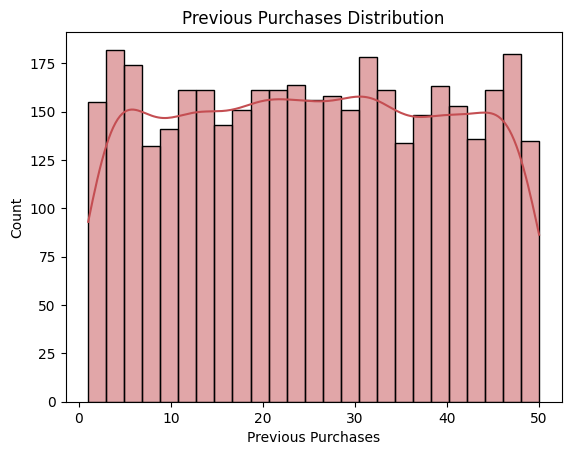

In [23]:
sns.histplot(df['Previous Purchases'], bins=25, kde=True, color="#C44E52")
plt.title("Previous Purchases Distribution")
plt.xlabel("Previous Purchases")
plt.ylabel("Count")
plt.show()


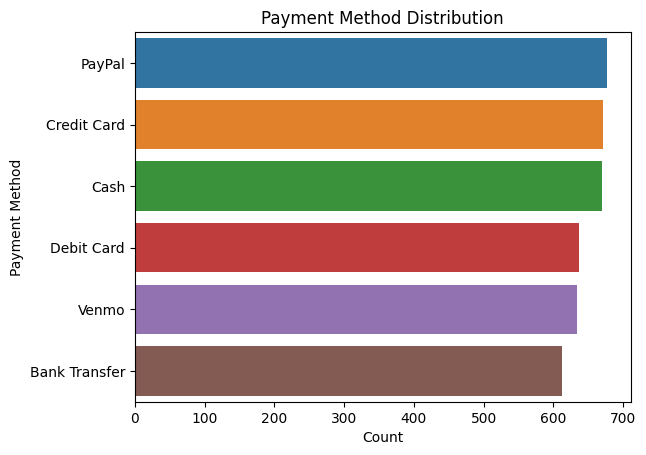

In [24]:
sns.countplot(
    y='Payment Method',
    data=df,
    palette='tab10',
    order=df['Payment Method'].value_counts().index
)
plt.title("Payment Method Distribution")
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.show()


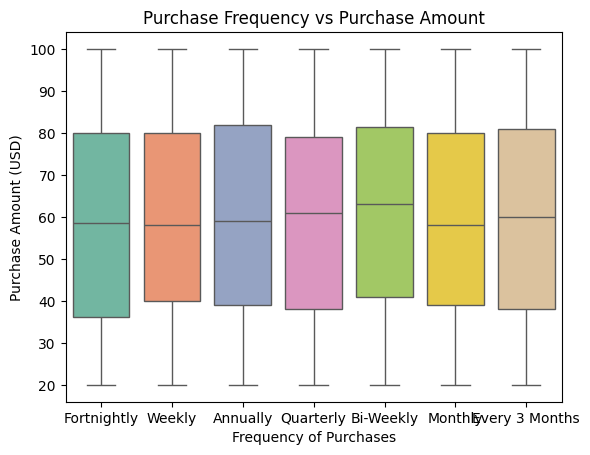

In [25]:
sns.boxplot(
    x='Frequency of Purchases',
    y='Purchase Amount (USD)',
    data=df,
    palette='Set2'
)
plt.title("Purchase Frequency vs Purchase Amount")
plt.xlabel("Frequency of Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.show()


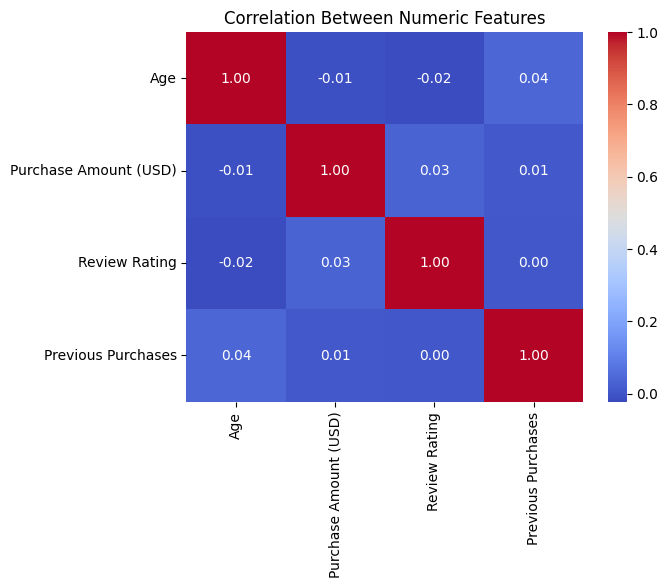

In [26]:
numeric_cols = [
    'Age',
    'Purchase Amount (USD)',
    'Review Rating',
    'Previous Purchases'
]

corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()


## Feature engg

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [28]:
# Drop ID column
df = df.drop(columns=['Customer ID'])

# Categorical columns
categorical_cols = [
    'Gender', 'Item Purchased', 'Category', 'Location',
    'Size', 'Color', 'Season', 'Payment Method',
    'Frequency of Purchases', 'Discount Applied'
]

# Label encode categorical features
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    le_dict[col] = le

# Encode target
target_le = LabelEncoder()
df['Subscription Status'] = target_le.fit_transform(df['Subscription Status'])


In [29]:
X = df.drop(columns=['Subscription Status'])
y = df['Subscription Status']


In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, n_jobs=-1),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1),
    "Linear SVM": LinearSVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}


In [33]:
results = []

for name, model in models.items():
    print(f"Training {name}...")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    rmse = mean_squared_error(y_test, y_pred) ** 0.5

    results.append([name, round(rmse, 4), round(accuracy, 2)])


Training Logistic Regression...
Training Random Forest...
Training Linear SVM...
Training Decision Tree...
Training Naive Bayes...


In [34]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "Accuracy (%)"]
).sort_values(by="Accuracy (%)", ascending=False)

results_df


,Model,RMSE,Accuracy (%)
0,Logistic Regression,0.3686,86.41
2,Linear SVM,0.3686,86.41
4,Naive Bayes,0.3686,86.41
1,Random Forest,0.4035,83.72
3,Decision Tree,0.4529,79.49


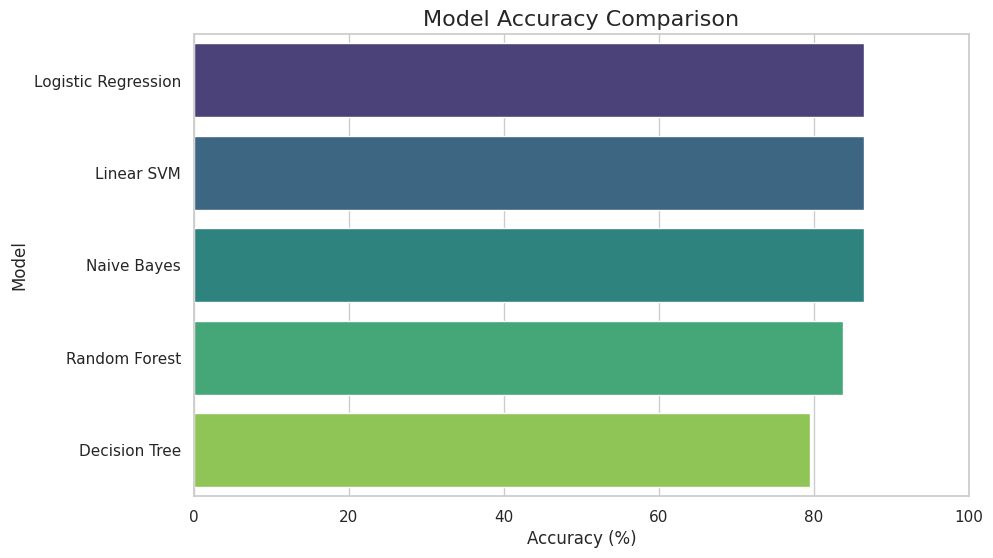

In [35]:
# Model performance data
data = {
    "Model": [
        "Logistic Regression",
        "Linear SVM",
        "Naive Bayes",
        "Random Forest",
        "Decision Tree"
    ],
    "RMSE": [0.3686, 0.3686, 0.3686, 0.4035, 0.4529],
    "Accuracy (%)": [86.41, 86.41, 86.41, 83.72, 79.49]
}

df = pd.DataFrame(data)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
sns.barplot(
    x="Accuracy (%)",
    y="Model",
    data=df,
    palette="viridis"
)

plt.title("Model Accuracy Comparison", fontsize=16)
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.xlim(0, 100)
plt.show()

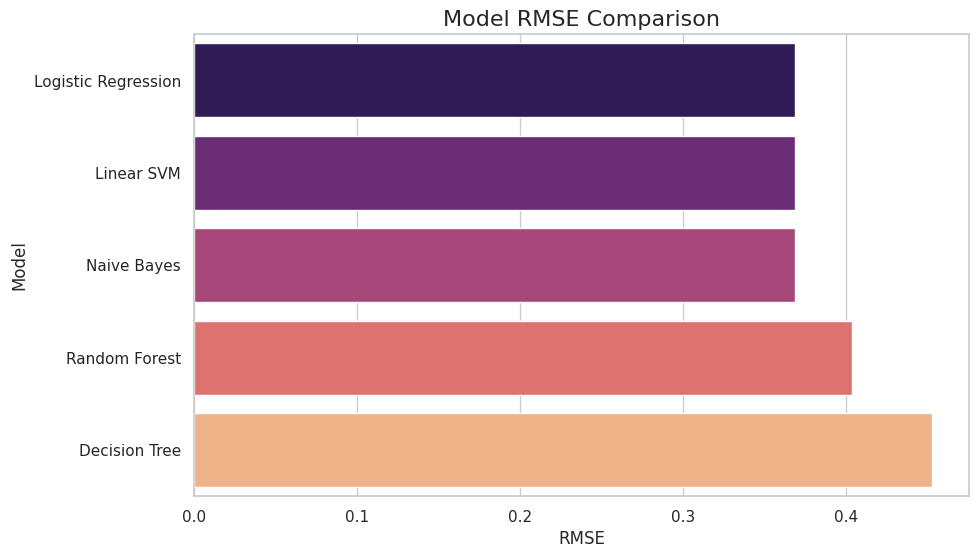

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="RMSE",
    y="Model",
    data=df,
    palette="magma"
)

plt.title("Model RMSE Comparison", fontsize=16)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()


## Thamk you..pls upvote!!!